#### Motivation
In general, the larger the validation set, the less randomness (aka "noise") there is in our measure of model quality, and the more reliable it will be. Unfortunately, we can only get a large validation set by removing rows from our training data, and smaller training datasets mean worse models!

#### Cross Validation
In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality.

For example, we could begin by dividing the data into 5 pieces, each 20% of the full dataset. In this case, we say that we have broken the data into 5 "folds".

<img src="static/cross_validation.png" style="zoom:40%"/>

Then, we run one experiment for each fold. Putting this together, 100% of the data is used as holdout at some point, and we end up with a measure of model quality that is based on all of the rows in the dataset (even if we don't use all rows simultaneously).

In [2]:
#set up

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

path = 'data/melb_data.csv'
data = pd.read_csv(path)

cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']

y = data.Price
X = data[cols_to_use]

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(random_state=0))
])


In [7]:
from sklearn.model_selection import cross_val_score

cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')


array([-301030.37999702, -301815.50787799, -285449.9265583 ,
       -234645.50725674, -259420.38429285])

In [19]:
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    # Replace this body with your own code
    pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(pipeline, X, y, cv=3, scoring='neg_mean_absolute_error')
    return sum(scores)/len(scores)

In [20]:
results = {num:get_score(num) for num in range(50, 450, 10)}

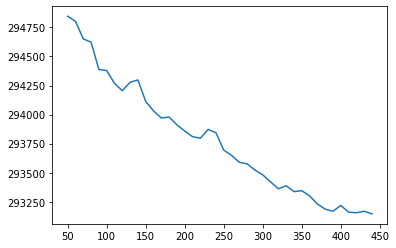

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()